In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\Abhilash\Desktop\Data Trained\Projects\Dataset\baseball.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result    

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
data.shape

(30, 17)

In [5]:
#The above data is having 30 rows and 17 columns

In [6]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
#ALl the data seems to be integert type and none as object


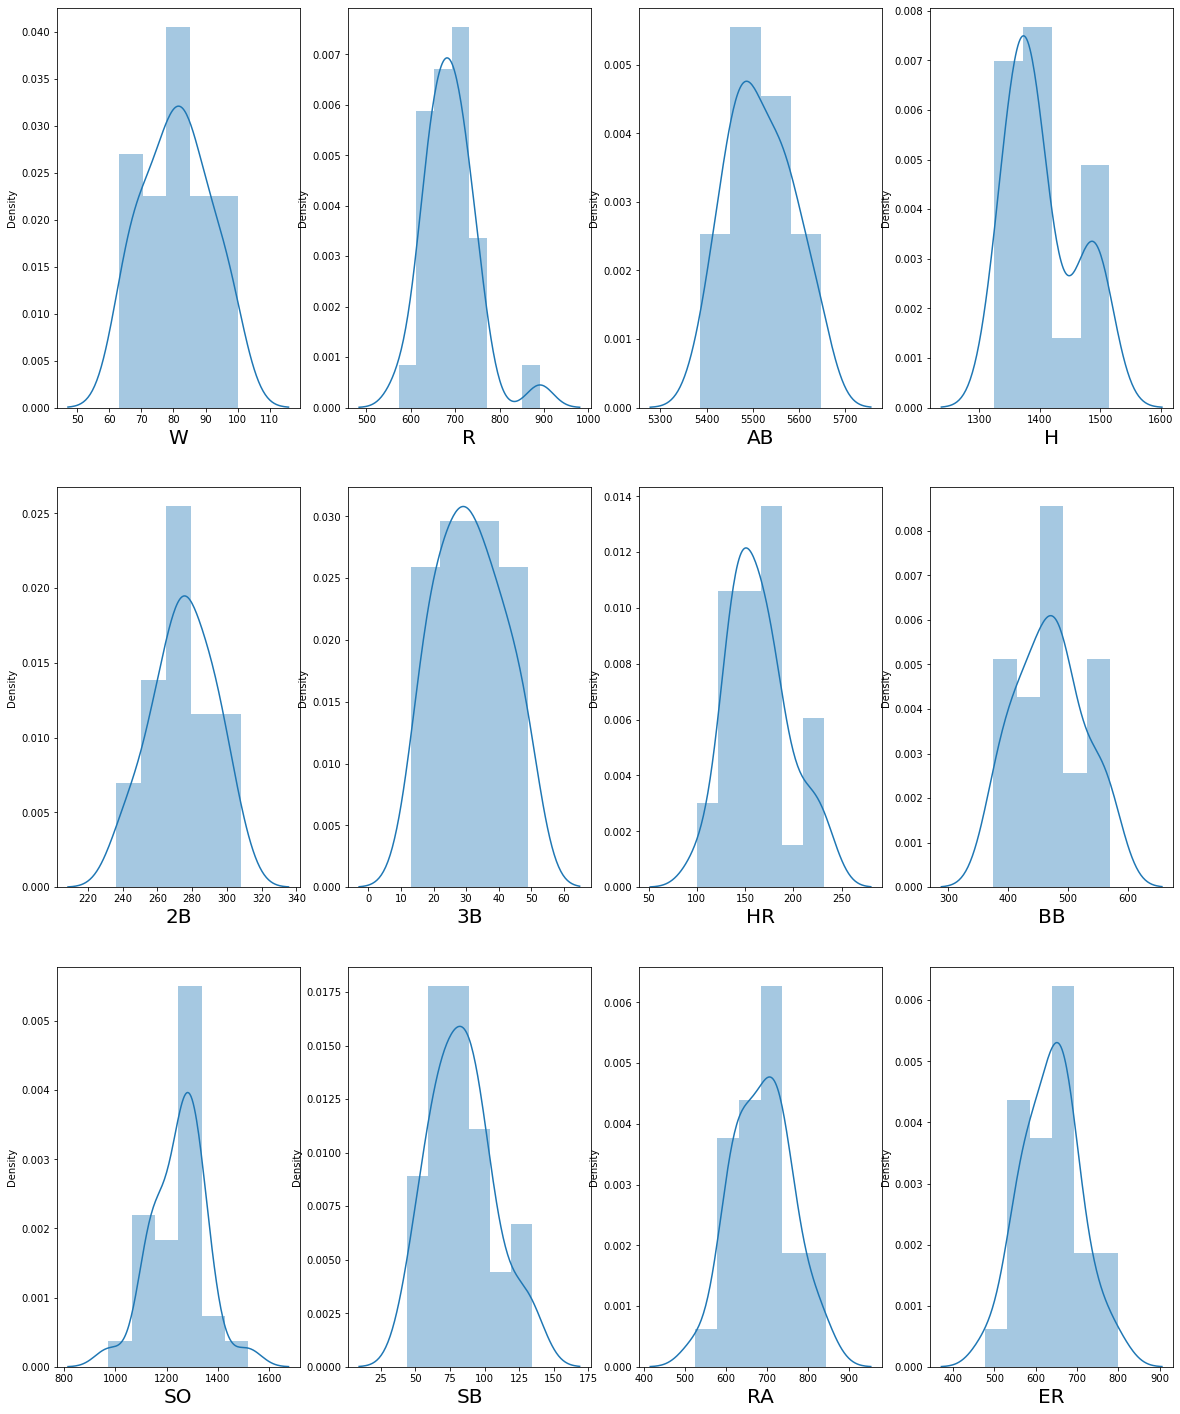

In [9]:
#Lets check how the data is distributed for every coulumn
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=12 :
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()    

<AxesSubplot:>

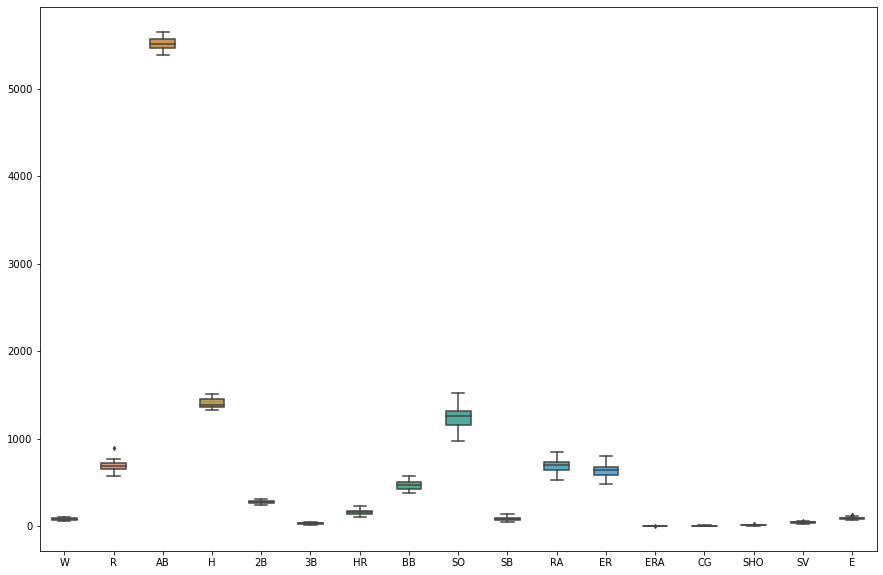

In [10]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width = 0.5,ax=ax,fliersize=3)

In [11]:
#we see some minute outliers present


In [12]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
x = data.drop(columns=['W'])
y= data['W']

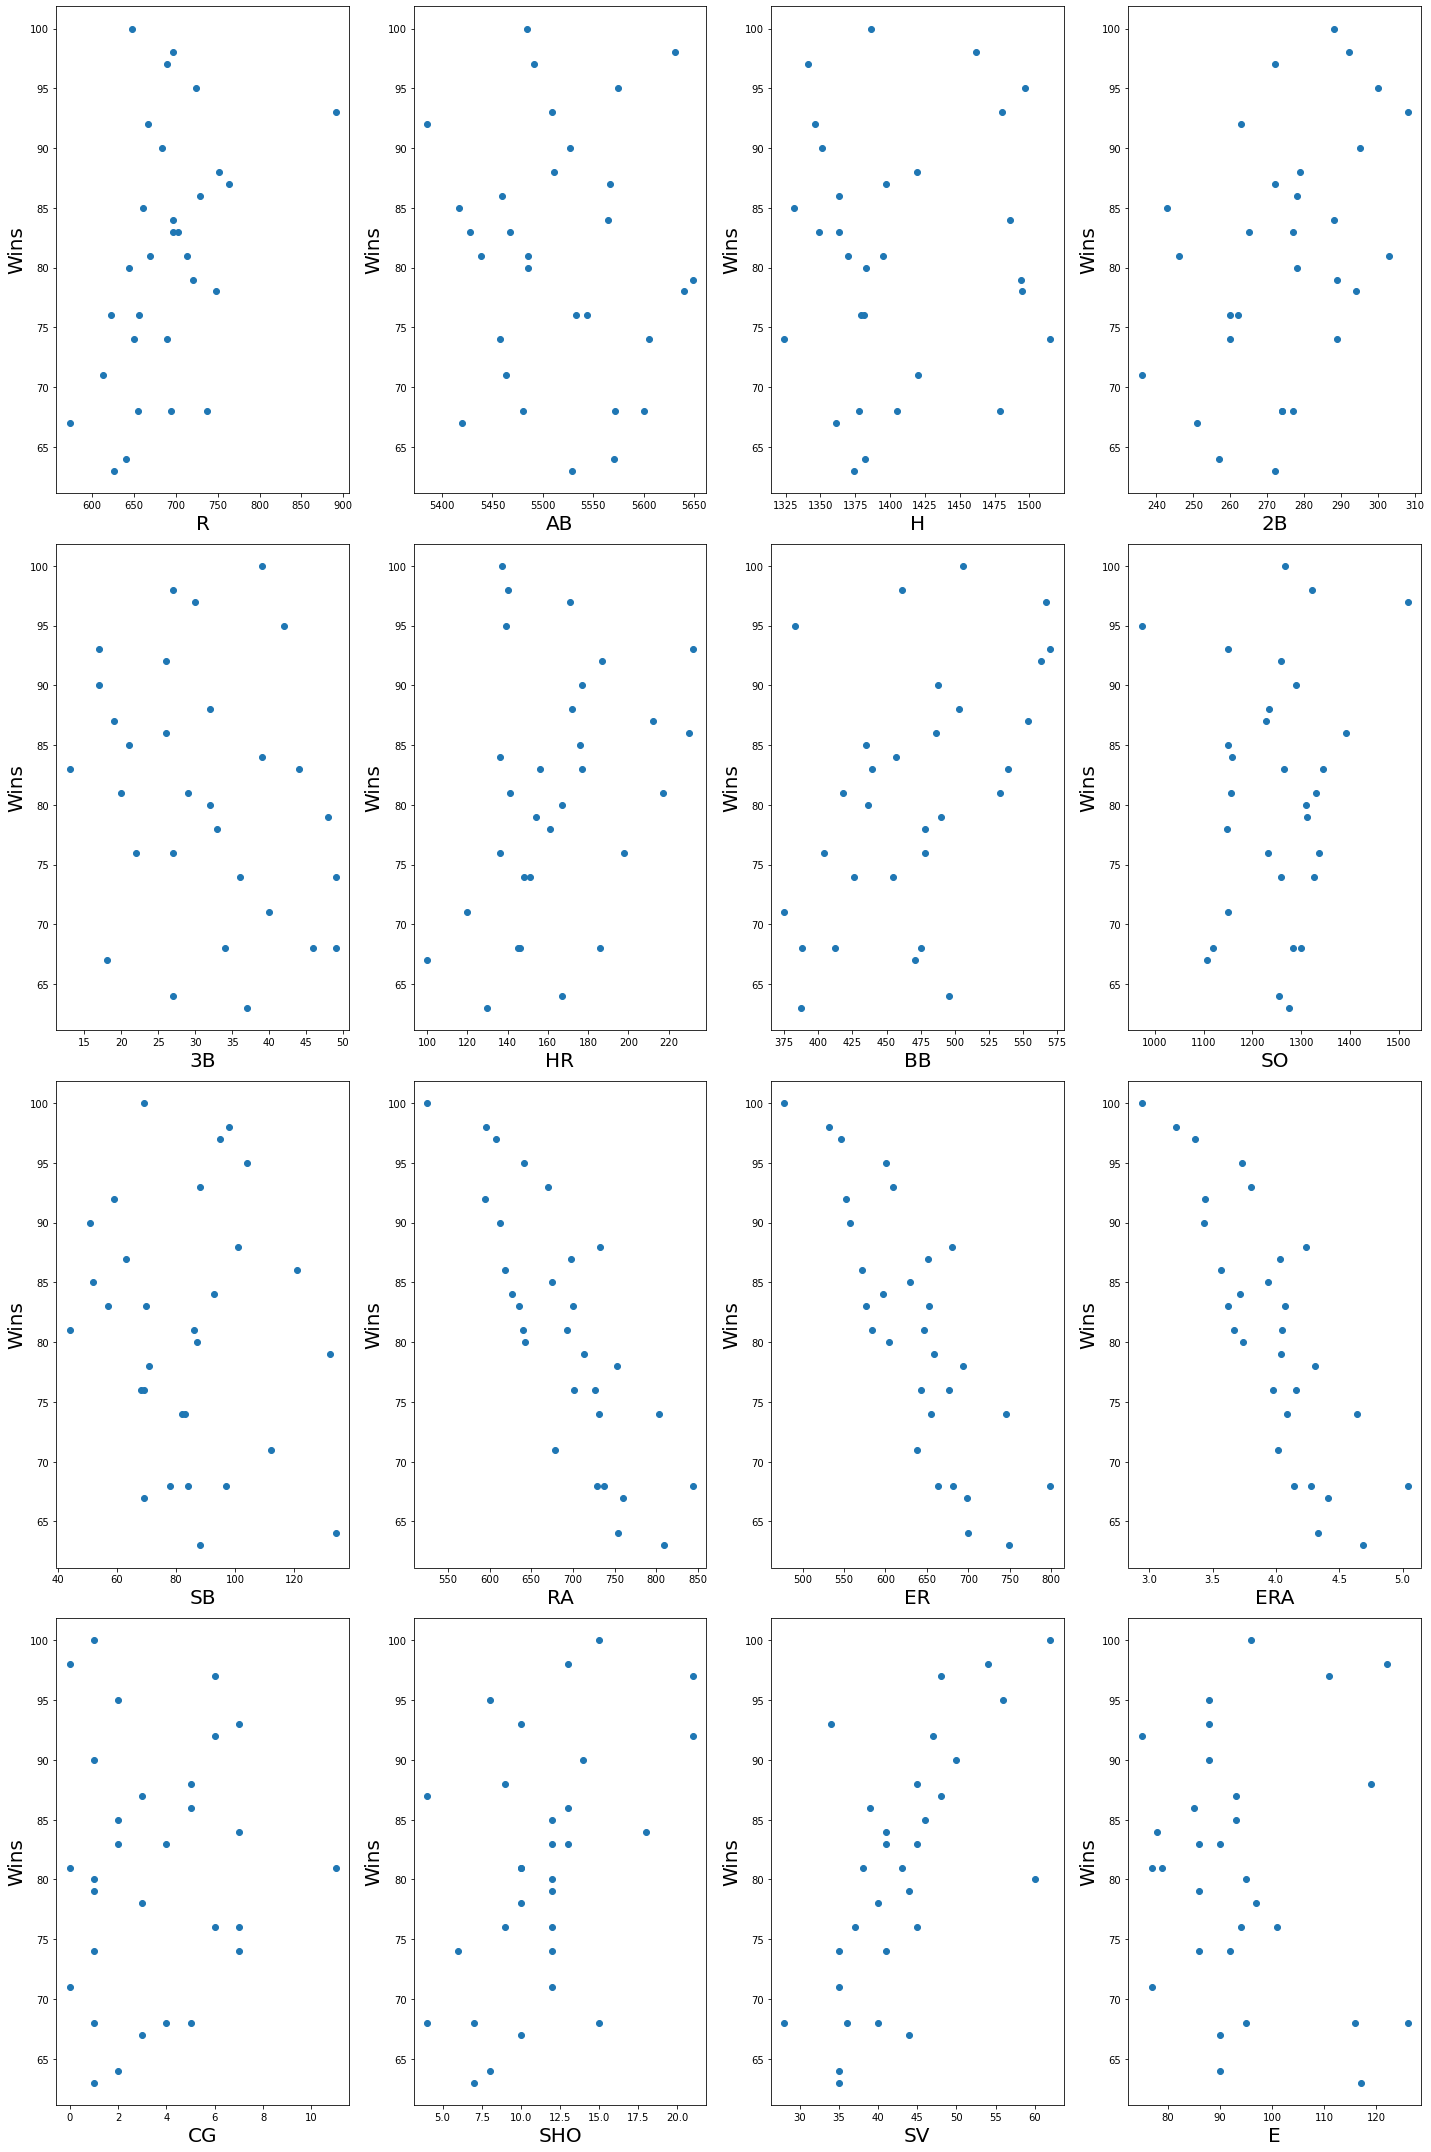

In [14]:
#relationship between feature and label
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=16:
        ax =plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Wins',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [21]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [16]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


In [25]:
x = data.drop(columns=['W','AB','ER'])
y = data['W']

In [26]:
scalar = StandardScaler()

x_scaled = scalar.fit_transform(x)

In [27]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#Lets check the values
vif

,vif,Features
0,9.069939,R
1,4.357233,H
2,3.701410,2B
3,3.084933,3B
4,6.846293,HR
5,3.776310,BB
6,2.538513,SO
7,1.841326,SB
8,91.644325,RA
9,88.914899,ERA


In [28]:
#Still RA and ERA has high multicolleanirity

In [31]:
x= data.drop(columns=['W','AB','ER','RA'])
y = data['W']

In [32]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [33]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#Lets check the values
vif

,vif,Features
0,8.942870,R
1,4.222148,H
2,3.504369,2B
3,3.050885,3B
4,6.691513,HR
5,3.247378,BB
6,2.148310,SO
7,1.779038,SB
8,4.912826,ERA
9,2.263493,CG


In [34]:
#Now it looks better than earlier ,here by trainning the model

# Multiple Linear Regression :-

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=355)

In [38]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [39]:
regression.score(x_train,y_train)

0.9529675728310817

In [40]:
regression.score(x_test,y_test)

0.8058135775995335

In [41]:
y_pred = regression.predict(x_test)

In [42]:
r2_score(y_test,y_pred)

0.8058135775995335

In [ ]:
#We have recieved tesrt score of 80.58 percent from the above model.

# Using Regularization

In [43]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [44]:
#Lasso regularization

lasscv = LassoCV(alphas = None, cv=10, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, normalize=True)

In [45]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.15110470678675278

In [46]:
#now that we have best parameter, lets use lasso regression and see how well our data has fitted
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.15110470678675278)

In [47]:
lasso_reg.score(x_test,y_test)

0.7577552065701201

In [48]:
#Lasso regression model's score has decreased than that of linear regression model

In [49]:
#using ridge regression model
#RidgeCV will return best alpha and coefficients after performing 10 cross validations
#we will pass an array of random numbers for RidgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high = 10, size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([2.54014178, 5.07066984, 9.00184573, 6.79168642, 9.20268422,
       0.55489511, 1.40967454, 1.10712924, 7.76262027, 1.82168963,
       9.62420129, 6.65456378, 7.59476836, 2.33539944, 9.72611969,
       7.40367302, 3.324648  , 8.15122631, 1.16719904, 9.97106602,
       6.22059657, 2.22683147, 7.16739505, 1.10359776, 3.90036147,
       4.48400198, 9.62782513, 0.62450462, 3.03883904, 3.0049487 ,
       8.14910772, 4.72362399, 6.51477756, 0.55524736, 8.10304387,
       4.53244458, 7.018017  , 1.87842774, 7.27184191, 7.33645287,
       9.42729039, 7.70044932, 2.55771191, 4.3922434 , 4.01104949,
       5.14072362, 5.25125819, 7.76870958, 9.76130589, 5.26930024]),
        cv=10, normalize=True)

In [50]:
ridgecv.alpha_

1.8216896335369503

In [51]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=1.8216896335369503)

In [52]:
ridge_model.score(x_test,y_test)

0.67257574828599

In [64]:
# We see Lassobit better than the ridge Model.

# Using Gradinet Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [57]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
print("\n================Train Result===========")
print(f"Accuracy score : {accuracy_score(y_train , pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_train , pred)}\n")


#*******************************Test Score*****************************************

pred = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print("\n====================Test Result=========================")
print(f"Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%")
print("------------------------")
print(f"Classification report :\n {gbdt_clf_report}")
print("________________________________________")
print(f"Confusion matrix : \n {confusion_matrix(y_test , pred)}\n")


================Train Result===========
Accuracy score : 100.00%
------------------------
Classification report :
             63   64   67   68   74   76   78   79   80   81  ...   84   85  \
precision  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0   
recall     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0   
f1-score   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0   
support    1.0  1.0  1.0  3.0  1.0  2.0  1.0  1.0  1.0  1.0  ...  1.0  1.0   

            87   92   97   98  100  accuracy  macro avg  weighted avg  
precision  1.0  1.0  1.0  1.0  1.0       1.0        1.0           1.0  
recall     1.0  1.0  1.0  1.0  1.0       1.0        1.0           1.0  
f1-score   1.0  1.0  1.0  1.0  1.0       1.0        1.0           1.0  
support    1.0  1.0  1.0  1.0  1.0       1.0       22.0          22.0  

[4 rows x 21 columns]
________________________________________
Confusion matrix : 
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0

In [58]:
#Tuning the data :
grid_param = {
    'max_depth' : range(4,12,2),
    'learning_rate' : np.arange(0.1,1,0.1),
    'min_samples_split' : range(4,8,2)
}

In [63]:
grid = GridSearchCV(gbdt_clf , param_grid = grid_param)
grid.fit(x_train,y_)

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [60]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [66]:
# from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=8)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          64       0.00      0.00      0.00       0.0
          67       0.00      0.00      0.00       0.0
          71       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          79       0.00      0.00      0.00       0.0
          80       0.00      0.00      0.00       0.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          84       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       1.0
          93       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0

    accuracy                           0.00       8.0
   macro avg       0.00      0.00      0.00       8.0
weighted avg       0.00      0.00      0.00       8.0



In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [89]:
lr = LinearRegression()
lv = LassoCV(alphas = None, cv=10, max_iter = 1000, normalize = True)
rv = Ridge(alpha=ridgecv.alpha_)


In [90]:
#Trainning with all classifiers

lr.fit(x_train,y_train)
lv.fit(x_train,y_train)
rv.fit(x_train,y_train)


print('All models are trained')

All models are trained


In [91]:
#All models score captured
lr.score(x_test,y_test)
lv.score(x_test,y_test)
rv.score(x_test,y_test)

print('All models score is captured ')

All models score is captured 


In [98]:
#As of all we have go the best efficieny for Linear regression we will consider the same.

In [100]:
import pickle
baseball = 'finalized_model.pickle'
pickle.dump(lr,open(baseball,'wb'))

In [102]:
loaded_model=pickle.load(open(baseball,'rb'))
a=loaded_model.predict(scaler.transform(x))